In [3]:
#!pip install selenium
#!pip install urllib3
#!pip install xmltodict

# Selenium Version

In [2]:
#!pip show selenium

Name: selenium
Version: 4.23.1
Summary: Official Python bindings for Selenium WebDriver
Home-page: https://www.selenium.dev
Author: 
Author-email: 
License: Apache 2.0
Location: C:\Users\NapatsakornRoswhan\anaconda3\Lib\site-packages
Requires: certifi, trio, trio-websocket, typing_extensions, urllib3, websocket-client
Required-by: 


In [ ]:
# selenium 4.23.1

# Installation Web-driver and URL

In [1]:
from selenium import webdriver
import urllib3
import xmltodict
import pandas as pd

In [2]:
https = urllib3.PoolManager()
sitemap_url = "https://www.nestle.co.th/sitemap.xml"

response = https.request('GET', sitemap_url)
sitemap = xmltodict.parse(response.data)
sitemap_df = pd.DataFrame.from_dict(sitemap['urlset']['url'])

## https://www.nestle.co.th/th/media/pressreleases for searching

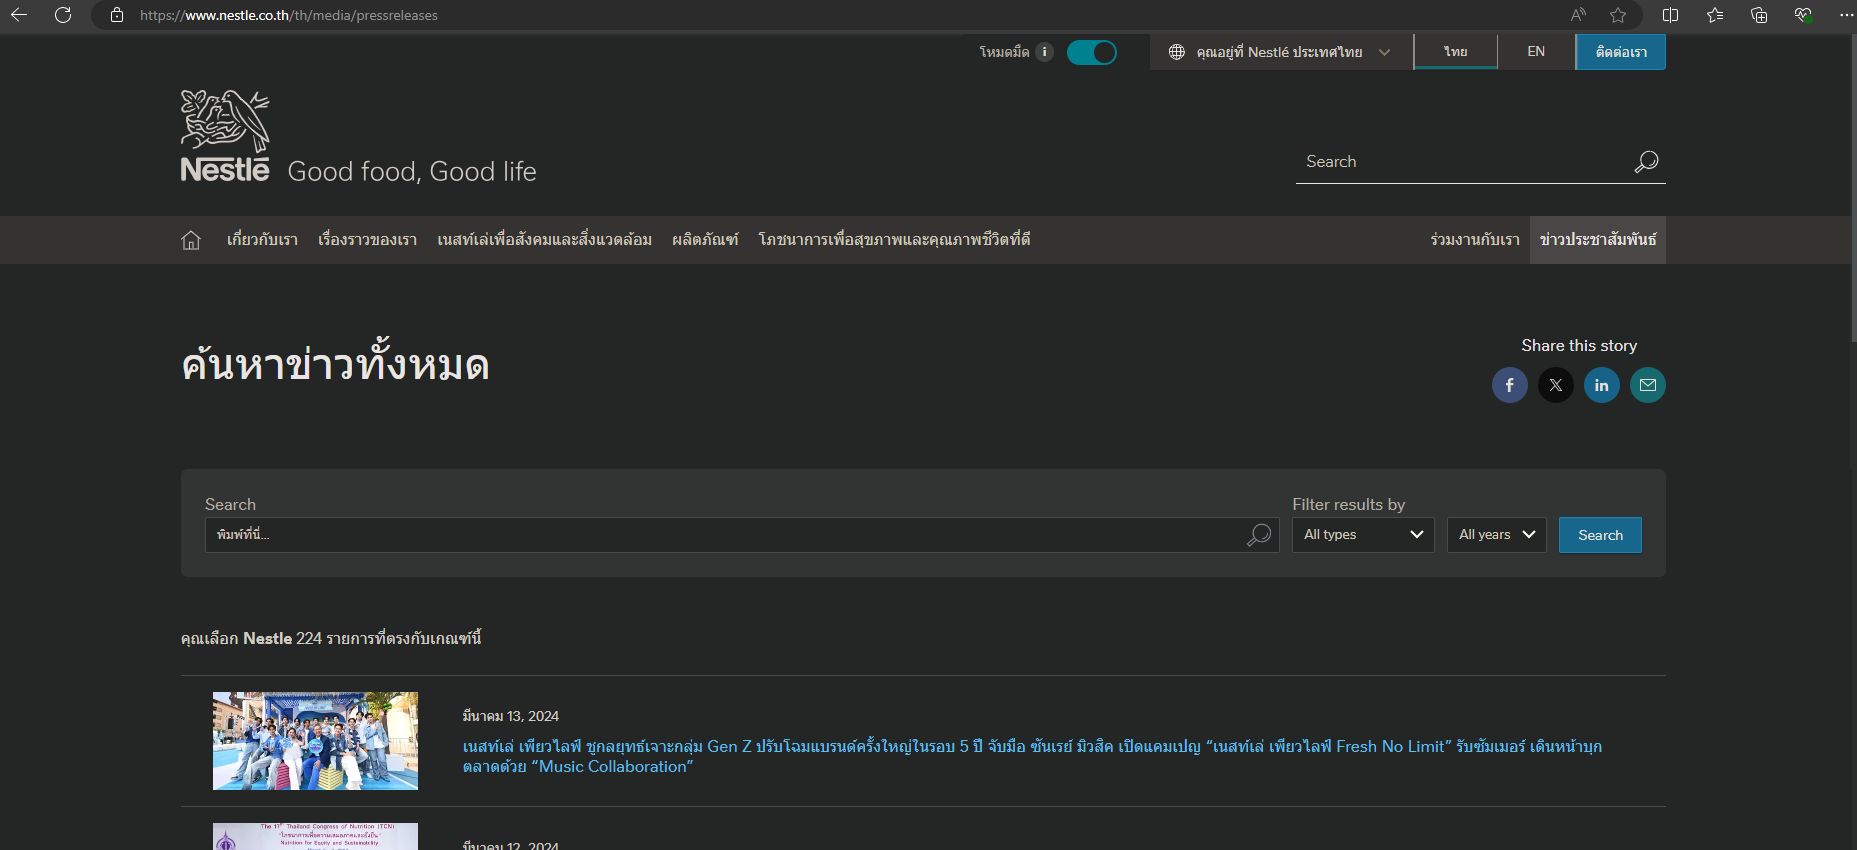

In [3]:
sitemap_df[sitemap_df["loc"].str.contains("https://www.nestle.co.th/th/media/pressreleases/")]["loc"].count()

254

In [4]:
sitemap_df[sitemap_df["loc"].str.contains("https://www.nestle.co.th/th/media/pressreleases/")]["loc"].unique()

array(['https://www.nestle.co.th/th/media/pressreleases/14th-fostat-nestle-quiz-bowl',
       'https://www.nestle.co.th/th/media/pressreleases/8-auspicious-delicious-recipes-by-maggi',
       'https://www.nestle.co.th/th/media/pressreleases/accera_acquisition',
       'https://www.nestle.co.th/th/media/pressreleases/advance-protextion-stage-3',
       'https://www.nestle.co.th/th/media/pressreleases/board-of-directors-and-executive-board',
       'https://www.nestle.co.th/th/media/pressreleases/brabeck_sai',
       'https://www.nestle.co.th/th/media/pressreleases/campaign-of-the-year-cwcn',
       'https://www.nestle.co.th/th/media/pressreleases/campaign-sleepy-hazy-stay-away-from-the-wheel',
       'https://www.nestle.co.th/th/media/pressreleases/cdu_opening',
       'https://www.nestle.co.th/th/media/pressreleases/ceo_visit',
       'https://www.nestle.co.th/th/media/pressreleases/chocoshape',
       'https://www.nestle.co.th/th/media/pressreleases/cocoa_plan_delivers_more_sustainabl

## EDA URL about pressreleases

In [51]:
sitemap_df[sitemap_df["loc"].str.contains("https://www.nestle.co.th/th/media")]["loc"].apply(lambda x : x.replace("https://www.nestle.co.th/th/media", "").strip()).unique()

array(['/pressreleases/14th-fostat-nestle-quiz-bowl',
       '/pressreleases/8-auspicious-delicious-recipes-by-maggi',
       '/pressreleases/accera_acquisition',
       '/pressreleases/advance-protextion-stage-3',
       '/pressreleases/board-of-directors-and-executive-board',
       '/pressreleases/brabeck_sai',
       '/pressreleases/campaign-of-the-year-cwcn',
       '/pressreleases/campaign-sleepy-hazy-stay-away-from-the-wheel',
       '/pressreleases/cdu_opening', '/pressreleases/ceo_visit',
       '/pressreleases/chocoshape',
       '/pressreleases/cocoa_plan_delivers_more_sustainable_cocoa',
       '/pressreleases/coffee-can-be-charity',
       '/pressreleases/coffee-mate-soy', '/pressreleases/coffee-mate_soy',
       '/pressreleases/csv-forum-2013-detailed-agenda',
       '/pressreleases/csv-forum-report-2012',
       '/pressreleases/csv-prize-winner-2012',
       '/pressreleases/csv-report-2012', '/pressreleases/csv_forum',
       '/pressreleases/cwcn-promotion2019',
       '

In [ ]:
# except url
except_url = ["/blog", "/media_contact", "library/corporate_roadshow_2011", "/library", "pre"]

## Implement action state

In [6]:
url = "https://www.nestle.co.th/th/media/pressreleases/nestlecare-2024"
driver = webdriver.Edge()
driver.get(url)

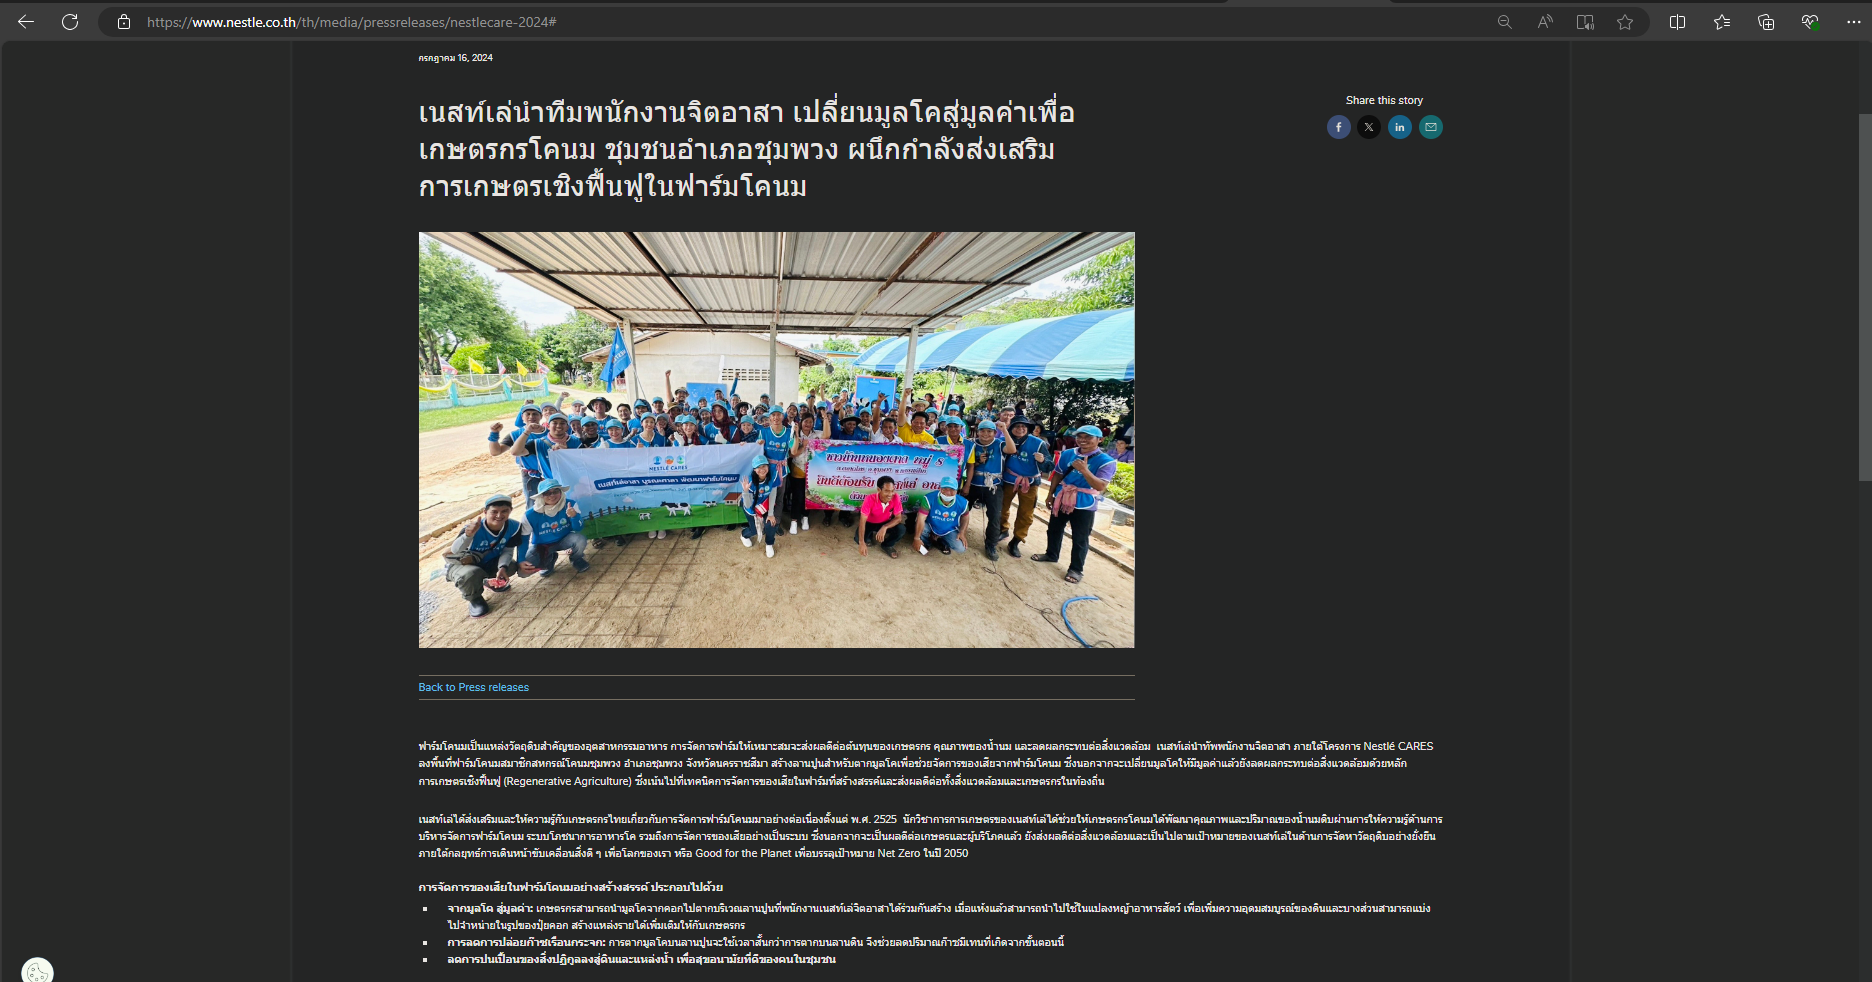

In [71]:
from selenium.webdriver.common.by import By
import re
from datetime import date, datetime

# Datetime
datetime_ = driver.find_element(By.XPATH, "//time[@datetime]") # get datetime
print("Date published: ",datetime_.text, "\n")

# Title
title = driver.find_element(By.XPATH, '//h1[@class="page-header__title"]') # get title
print("Title page: ",title.text, "\n")

# Content
content = driver.find_elements(By.XPATH, '//p')
content_test = content[:14]
for n in range(len(content_test)):
    if content_test[n].text == None or content_test[n].text.strip() == "":
        continue
    print(f"[content{n}]",content_test[n].text, "\n")

Date published:  กรกฎาคม 16, 2024 

Title page:  เนสท์เล่นำทีมพนักงานจิตอาสา เปลี่ยนมูลโคสู่มูลค่าเพื่อเกษตรกรโคนม ชุมชนอำเภอชุมพวง ผนึกกำลังส่งเสริมการเกษตรเชิงฟื้นฟูในฟาร์มโคนม 

[content7] ฟาร์มโคนมเป็นแหล่งวัตถุดิบสำคัญของอุตสาหกรรมอาหาร การจัดการฟาร์มให้เหมาะสมจะส่งผลดีต่อต้นทุนของเกษตรกร คุณภาพของน้ำนม และลดผลกระทบต่อสิ่งแวดล้อม  เนสท์เล่นำทัพพนักงานจิตอาสา ภายใต้โครงการ Nestlé CARES ลงพื้นที่ฟาร์มโคนมสมาชิกสหกรณ์โคนมชุมพวง อำเภอชุมพวง จังหวัดนครราชสีมา สร้างลานปูนสำหรับตากมูลโคเพื่อช่วยจัดการของเสียจากฟาร์มโคนม ซึ่งนอกจากจะเปลี่ยนมูลโคให้มีมูลค่าแล้วยังลดผลกระทบต่อสิ่งแวดล้อมด้วยหลักการเกษตรเชิงฟื้นฟู (Regenerative Agriculture) ซึ่งเน้นไปที่เทคนิคการจัดการของเสียในฟาร์มที่สร้างสรรค์และส่งผลดีต่อทั้งสิ่งแวดล้อมและเกษตรกรในท้องถิ่น 

[content8] เนสท์เล่ได้ส่งเสริมและให้ความรู้กับเกษตรกรไทยเกี่ยวกับการจัดการฟาร์มโคนมมาอย่างต่อเนื่องตั้งแต่ พ.ศ. 2525  นักวิชาการการเกษตรของเนสท์เล่ได้ช่วยให้เกษตรกรโคนมได้พัฒนาคุณภาพและปริมาณของน้ำนมดิบผ่านการให้ความรู้ด้านการบริหารจัดการฟาร์มโคนม ระบ

In [78]:
month_thai = {"มกราคม":"01", "กุมภาพันธ์":"02", "มีนาคม":"03", "เมษายน":"04", "พฤษภาคม":"05",
             "มิถุนายน":"06", "กรกฎาคม":"07", "สิงหาคม":"08", "กันยายน":"09", "ตุลาคม": "10",
             "พฤศจิกายน":"11", "ธันวาคม":"12"}

In [82]:
print(datetime_.text)
print(re.search("[0-9]{4}", datetime_.text).group())
print(datetime.strptime("07 16, 2024", "%m %d, %Y"))
print(re.search("[ก-๙]+", datetime_.text))

กรกฎาคม 16, 2024
2024
2024-07-16 00:00:00
<re.Match object; span=(0, 7), match='กรกฎาคม'>


### Comparison scraping all tag 'p'

In [51]:
for n in range(len(content)):
    if content[n].text == None or content[n].text.strip() == "":
        continue
    print(content[n].text, "\n")

ฟาร์มโคนมเป็นแหล่งวัตถุดิบสำคัญของอุตสาหกรรมอาหาร การจัดการฟาร์มให้เหมาะสมจะส่งผลดีต่อต้นทุนของเกษตรกร คุณภาพของน้ำนม และลดผลกระทบต่อสิ่งแวดล้อม  เนสท์เล่นำทัพพนักงานจิตอาสา ภายใต้โครงการ Nestlé CARES ลงพื้นที่ฟาร์มโคนมสมาชิกสหกรณ์โคนมชุมพวง อำเภอชุมพวง จังหวัดนครราชสีมา สร้างลานปูนสำหรับตากมูลโคเพื่อช่วยจัดการของเสียจากฟาร์มโคนม ซึ่งนอกจากจะเปลี่ยนมูลโคให้มีมูลค่าแล้วยังลดผลกระทบต่อสิ่งแวดล้อมด้วยหลักการเกษตรเชิงฟื้นฟู (Regenerative Agriculture) ซึ่งเน้นไปที่เทคนิคการจัดการของเสียในฟาร์มที่สร้างสรรค์และส่งผลดีต่อทั้งสิ่งแวดล้อมและเกษตรกรในท้องถิ่น 

เนสท์เล่ได้ส่งเสริมและให้ความรู้กับเกษตรกรไทยเกี่ยวกับการจัดการฟาร์มโคนมมาอย่างต่อเนื่องตั้งแต่ พ.ศ. 2525  นักวิชาการการเกษตรของเนสท์เล่ได้ช่วยให้เกษตรกรโคนมได้พัฒนาคุณภาพและปริมาณของน้ำนมดิบผ่านการให้ความรู้ด้านการบริหารจัดการฟาร์มโคนม ระบบโภชนาการอาหารโค รวมถึงการจัดการของเสียอย่างเป็นระบบ ซึ่งนอกจากจะเป็นผลดีต่อเกษตรและผู้บริโภคแล้ว ยังส่งผลดีต่อสิ่งแวดล้อมและเป็นไปตามเป้าหมายของเนสท์เล่ในด้านการจัดหาวัตถุดิบอย่างยั่งยืน ภายใต้กลยุทธ์กา

# Function for scraping all

In [86]:
text_except = ["Share this page", "หากคุณพบการกระทำที่อาจขัดต่อหลักปฏิบัติทางธุรกิจของเนสท์เล่",
              "ติดตามนวัตกรรมการวิจัยผลิตภัณฑ์ใหม่ๆจากแล็บของเรา", "วิสัยทัศน์ งานวิจัยและพัฒนา", "ดูผลิตภัณฑ์ทั้งหมดของเรา",
              "ผลิตภัณฑ์",
               "We unlock the power of food to enhance quality of life for everyone, today and for generations to come"]

In [88]:
all_url = sitemap_df[sitemap_df["loc"].str.contains("https://www.nestle.co.th/th/media/pressreleases/")]["loc"].unique()
title = []
content = []
date = []
year = []
def main(debug=True):
    driver = webdriver.Edge()
    for url in all_url:
        print(url)
        driver.get(url)
        datetime_text = driver.find_element(By.XPATH, "//time[@datetime]") # get datetime
        month = re.search("[ก-๙]+", datetime_text.text).group()
        datetime_object = datetime_text.text.replace(month, month_thai[month])
        year_text = re.search("[0-9]{4}", datetime_text.text).group()
        title_text = driver.find_element(By.XPATH, '//h1[@class="page-header__title"]') # get title
        content_text = driver.find_elements(By.XPATH, '//p')
        content_text = content_text[:14]
        text = ""
        for n in range(len(content_text)):
            if content_text[n].text.strip() == None or content_text[n].text.strip() == "" or content_text[n].text in text_except:
                continue
            if text == "":
                text = content_text[n].text.strip()
            else:
                text = text + "|" + content_text[n].text.strip()
        if debug:
            print(datetime_object, year_text, title_text.text, text)
        date.append(datetime_object)
        year.append(year_text)
        title.append(title_text.text)
        content.append(text)
main(debug=False)

https://www.nestle.co.th/th/media/pressreleases/14th-fostat-nestle-quiz-bowl
https://www.nestle.co.th/th/media/pressreleases/8-auspicious-delicious-recipes-by-maggi
https://www.nestle.co.th/th/media/pressreleases/accera_acquisition
https://www.nestle.co.th/th/media/pressreleases/advance-protextion-stage-3
https://www.nestle.co.th/th/media/pressreleases/board-of-directors-and-executive-board
https://www.nestle.co.th/th/media/pressreleases/brabeck_sai
https://www.nestle.co.th/th/media/pressreleases/campaign-of-the-year-cwcn
https://www.nestle.co.th/th/media/pressreleases/campaign-sleepy-hazy-stay-away-from-the-wheel
https://www.nestle.co.th/th/media/pressreleases/cdu_opening
https://www.nestle.co.th/th/media/pressreleases/ceo_visit
https://www.nestle.co.th/th/media/pressreleases/chocoshape
https://www.nestle.co.th/th/media/pressreleases/cocoa_plan_delivers_more_sustainable_cocoa
https://www.nestle.co.th/th/media/pressreleases/coffee-can-be-charity
https://www.nestle.co.th/th/media/pressr

In [93]:
print(len(all_url), len(date), len(title), len(content))

254 254 254 254


In [103]:
date_dt = [datetime.strptime(n, "%m %d, %Y") if n != "04 2020" else datetime(2020, 4, 1) for n in date]

In [108]:
df_nestle = pd.DataFrame({"date":date_dt, "year":year, "title":title, "content":content, "link":all_url})

In [109]:
df_nestle

,date,year,title,content,link
0,2016-08-21,2016,เนสท์เล่สานต่อ FoSTAT-Nestlé Quiz Bowl,เนสท์เล่ ร่วมพัฒนานักวิทยาศาสตร์อาหารรุ่นใหม่\...,https://www.nestle.co.th/th/media/pressrelease...
1,2016-01-27,2016,หมอช้างชวนปรุงเมนูอร่อย รับมงคลฉลองเทศกาลตรุษจ...,กรุงเทพฯ – 22 มกราคม 2559 - ผลิตภัณฑ์แม็กกี้ โ...,https://www.nestle.co.th/th/media/pressrelease...
2,2012-07-16,2012,หน่วยธุรกิจวิทยาการสุขภาพ เนสท์เล่ เดินหน้าลงท...,หน่วยธุรกิจวิทยาการสุขภาพ เนสท์เล่\nเข้าซื้อหุ...,https://www.nestle.co.th/th/media/pressrelease...
3,2016-03-18,2016,Engage Thai mothers to develop their children’...,"Bangkok – March 15, 2016: BEAR BRAND Growing-U...",https://www.nestle.co.th/th/media/pressrelease...
4,2016-06-30,2016,คณะกรรมการ และกรรมการบริหารบริษัทเนสท์เล่,ณ การประชุมสามัญประจำปีครั้งที่ 150 ของเนสท์เล...,https://www.nestle.co.th/th/media/pressrelease...
...,...,...,...,...,...
249,2024-05-14,2024,เนสท์เล่ลงนามบันทึกความเข้าใจความร่วมมือทางวิช...,บริษัท เนสท์เล่ (ไทย) จำกัด ลงนามบันทึกความเข้...,https://www.nestle.co.th/th/media/pressrelease...
250,2024-06-19,2024,เนสท์เล่ สนับสนุนการแข่งขัน FoSTAT – Nestlé Qu...,ผศ.พวงเพ็ชร์ นิธยานนท์ (ที่ 2 จากซ้าย) นายกสมา...,https://www.nestle.co.th/th/media/pressrelease...
251,2024-07-05,2024,เนสท์เล่เดินสายทั่วประเทศให้ความรู้ด้านสุขภาพแ...,เนสท์เล่ สานต่อพันธกิจด้านการเสริมสร้างสุขภาพแ...,https://www.nestle.co.th/th/media/pressrelease...
252,2024-07-16,2024,เนสท์เล่นำทีมพนักงานจิตอาสา เปลี่ยนมูลโคสู่มูล...,ฟาร์มโคนมเป็นแหล่งวัตถุดิบสำคัญของอุตสาหกรรมอา...,https://www.nestle.co.th/th/media/pressrelease...


In [110]:
df_nestle.to_excel("nestle_demo.xlsx", index=False)